In [2]:
import numpy as np
from itertools import product
import pickle
from search import *


# Examples

## SERPENT

In [3]:
with open("clear_s_boxes/serpent_s_boxes_binary.pickle", "rb") as f:
    sboxes = pickle.load(f)

print("For SERPENT :")
for i, sbox in enumerate(sboxes):
    for j, bit in enumerate(sbox):
        print('---------------------------------------')
        serpent_generic = lambda input : sboxes[i][j][sum([x * 2 ** i for i, x in enumerate(input)])]
        encodings, p = full_search(serpent_generic, 4, 15)
        f, t = get_final_encoding(serpent_generic, 4, encodings, p)
        print(f"S_Box {i}, Bit {j} :")
        print(f"p : {p}")
        print(f"Encodings : {encodings}")
        print(f"Final encodings : False : {f} and True : {t}")


For SERPENT :
---------------------------------------
p:3
p:5
p:7
S_Box 0, Bit 0 :
p : 7
Encodings : [1, 2, 2, 1]
Final encodings : False : {0, 3, 4} and True : {1, 2, 5, 6}
---------------------------------------
p:3
p:5
p:7
p:9
p:11
S_Box 0, Bit 1 :
p : 11
Encodings : [1, 2, 8, 5]
Final encodings : False : {0, 1, 3, 4, 8} and True : {2, 5, 6, 7, 9, 10}
---------------------------------------
p:3
p:5
p:7
p:9
p:11
S_Box 0, Bit 2 :
p : 11
Encodings : [1, 3, 9, 5]
Final encodings : False : {1, 4, 6, 7, 8} and True : {0, 2, 3, 5, 9, 10}
---------------------------------------
p:3
p:5
p:7
p:9
p:11
S_Box 0, Bit 3 :
p : 11
Encodings : [1, 2, 8, 6]
Final encodings : False : {1, 4, 6, 8, 9} and True : {0, 2, 3, 5, 7, 10}
---------------------------------------
p:3
p:5
p:7
p:9
S_Box 1, Bit 0 :
p : 9
Encodings : [1, 4, 2, 6]
Final encodings : False : {3, 4, 5, 6, 8} and True : {0, 1, 2, 7}
---------------------------------------
p:3
p:5
p:7
S_Box 1, Bit 1 :
p : 7
Encodings : [1, 6, 2, 2]
Final e

## ASCON

In [4]:

with open("clear_s_boxes/ascon_s_boxes_binary.pickle", "rb") as f:
    sboxes = pickle.load(f)

print("For ASCON :")

for i, sbox in enumerate(sboxes):
    for j, bit in enumerate(sbox):
        ascon_generic = lambda input: sboxes[i][j][sum([x * 2 ** i for i, x in enumerate(input)])]
        encodings, p = full_search(ascon_generic, 5)
        f, t = get_final_encoding(ascon_generic, 5, encodings, p)
        print(f"S_Box {i}, Bit {j} :")
        print(f"p : {p}")
        print(f"Encodings : {encodings}")
        print(f"Final encodings : False : {f} and True : {t}")

For ASCON :
p:3
p:5
p:7
p:9
p:11
p:13
p:15
p:17
S_Box 0, Bit 0 :
p : 17
Encodings : [1, 2, 3, 7, 14]
Final encodings : False : {0, 1, 5, 6, 8, 9, 11, 12, 16} and True : {2, 3, 4, 7, 10, 13, 14, 15}
p:3
p:5
p:7
S_Box 0, Bit 1 :
p : 7
Encodings : [1, 3, 3, 3, 1]
Final encodings : False : {0, 2, 4} and True : {1, 3, 5, 6}
p:3
p:5
p:7
S_Box 0, Bit 2 :
p : 7
Encodings : [1, 6, 2, 2, 0]
Final encodings : False : {1, 2, 5} and True : {0, 3, 4, 6}
p:3
p:5
p:7
p:9
p:11
p:13
p:15
S_Box 0, Bit 3 :
p : 15
Encodings : [1, 14, 5, 5, 2]
Final encodings : False : {0, 4, 6, 7, 8, 10} and True : {1, 2, 3, 5, 9, 11, 12, 13, 14}
p:3
p:5
p:7
p:9
p:11
S_Box 0, Bit 4 :
p : 11
Encodings : [1, 2, 0, 4, 3]
Final encodings : False : {0, 3, 6, 7, 8} and True : {1, 2, 4, 5, 9, 10}


## SIMON / TRIVIUM

In [5]:
def simon(x):
    return x[0] & x[1] ^ x[2] ^ x[3] ^ x[4]

symmetries_simon = [
    (0, 1),
    (2, 3, 4)
]

encodings, p = full_search(simon, 5, symmetries=symmetries_simon)
f, t = get_final_encoding(simon, 5, encodings, p)
print(f"p : {p}")
print(f"Encodings : {encodings}")
print(f"Final encodings : False : {f} and True : {t}")



p:3
p:5
p:7
p:9
p : 9
Encodings : [1, 1, 2, 2, 2]
Final encodings : False : {0, 1, 4, 5, 8} and True : {2, 3, 6, 7}


# SHA 3

Only the $\texttt{AND}$ of the function $\chi$.

In [6]:
def _and(x):
    return x[0] & x[1]


print(full_search(_and, 2))

p:3
([1, 1], 3)


# Test timings algorithm

In [31]:
from random import randint
from time import time
from sympy import primerange
import pandas as pd

def random_boolean_function(l):
    table = [randint(0, 1) for _ in range(1<<l)]
    return lambda x : table[sum([xi * 1 << i for i, xi in enumerate(x)])]


def timing_search(f, l, p):
    constraints = create_set_constraints(f, l)
    t = time()
    result = search([1], constraints, p, l)
    t = time() - t
    return t, bool(result)


buffer = []

for _ in range(100):
    for l in range(2, 10):
        for p in primerange(3, 40):
            f = random_boolean_function(l)
            t, found = timing_search(f, l, p)
            buffer.append([p, l, t, found])

timings = pd.DataFrame(buffer, columns=["p", "l", "timing", "found?"])



In [38]:
buffer = []
for _ in range(1):
    for l in range(2, 9):
        for p in primerange(40, 44):
            print(f"l:{l};p:{p}")
            f = random_boolean_function(l)
            t, found = timing_search(f, l, p)
            buffer.append([p, l, t, found])
timings_complements = pd.DataFrame(buffer, columns=["p", "l", "timing", "found?"])


l:2;p:41
l:2;p:43
l:3;p:41
l:3;p:43
l:4;p:41
l:4;p:43
l:5;p:41
l:5;p:43
l:6;p:41
l:6;p:43
l:7;p:41
l:7;p:43
l:8;p:41
l:8;p:43


In [39]:
timings = pd.concat([timings, timings_complements])

/tmp/ipykernel_32518/2649560484.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='(l, p)', y='speed', data=data, palette=sns.color_palette())
/tmp/ipykernel_32518/2649560484.py:44: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x='(l, p)', y='speed', data=data, palette=sns.color_palette())


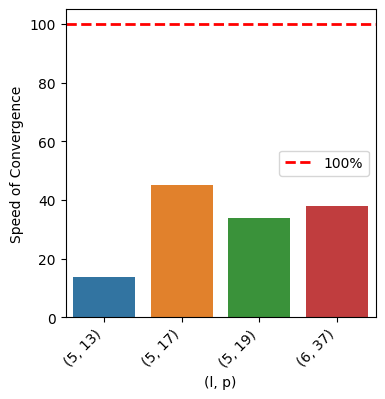

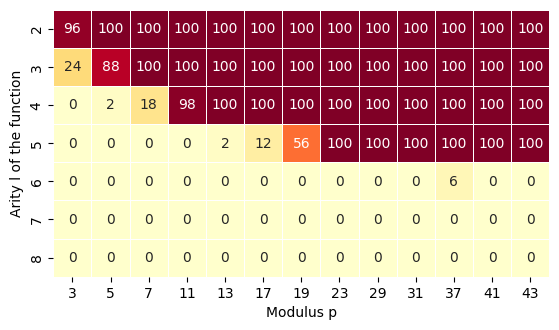

/tmp/ipykernel_32518/2649560484.py:15: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data, x="p", y="mean_timing", hue="l", palette=sns.color_palette())


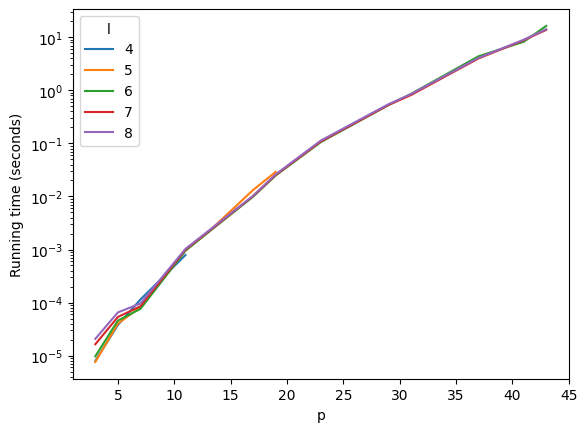

     p  l     timing  found?
0    3  2   0.000014    True
1    5  2   0.000009    True
2    7  2   0.000008    True
3   11  2   0.000008    True
4   13  2   0.000004    True
..  .. ..        ...     ...
9   43  6  16.390128   False
10  41  7   8.798013   False
11  43  7  13.782206   False
12  41  8   9.006622   False
13  43  8  14.176563   False

[4414 rows x 4 columns]


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



def plot_timings(timings):
    timings = pd.DataFrame(timings[timings["found?"] == False])
    buffer = []
    for l in range(4, 9):
        for p in primerange(3, 44):
            data = timings[(timings["p"] == p) & (timings["l"] == l)]
            buffer.append([l, p, data["timing"].mean()])
    data = pd.DataFrame(buffer, columns=["l", "p", "mean_timing"])
    sns.lineplot(data, x="p", y="mean_timing", hue="l", palette=sns.color_palette())
    plt.yscale('log')
    plt.ylabel('Running time (seconds)')
    plt.show()


def plot_timing_success(timings):
    buffer = []
    for l in range(5, 9):
        for p in primerange(3, 44):
            data = timings[(timings["p"] == p) & (timings["l"] == l)]
            success = data[(data["found?"] == True)]
            failures = data[(data["found?"] == False)]
            if success.shape[0] > 0 and failures.shape[0] > 0:
                avg_time_success = success["timing"].mean()
                avg_time_failure = failures["timing"].mean()
                speed_of_convergence = avg_time_success / avg_time_failure
                buffer.append([(l, p), speed_of_convergence])
    data = pd.DataFrame(buffer, columns=["(l, p)", "speed"])

    # Convert "(l, p)" tuples to strings
    data["(l, p)"] = data["(l, p)"].astype(str)
    data['speed'] *= 100

    # Sort DataFrame based on the "(l, p)" column
    data.sort_values("(l, p)", inplace=True)

    # Create a bar plot using Seaborn
    plt.figure(figsize=(4, 4))
    sns.barplot(x='(l, p)', y='speed', data=data, palette=sns.color_palette())
    plt.xlabel('(l, p)')
    plt.ylabel('Speed of Convergence')
    plt.axhline(y=100, color='red', linestyle='--', linewidth=2, label='100%')  # Add a reference line at y=1
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.legend()
    plt.show()
    




def plot_heatmap_success(timings):
    successes = []
    for l in range(2, 9):
        for p in primerange(3, 44):
            n = ((timings['p'] == p) & (timings['l'] == l) & (timings["found?"])).sum()
            if p > 37:
                n*=100
            else:
                n*=2
            successes.append([
                p, l, n
            ])
    
    s = pd.DataFrame(successes, columns=["Modulus p", "Arity l of the function", "n_success"])
    sns.heatmap(s.pivot(
        index="Arity l of the function", 
        columns="Modulus p", 
        values="n_success"), 
        annot=True, 
        fmt=".0f", 
        linewidth=.5, 
        robust=True, 
        cmap='YlOrRd', 
        cbar=False,
        square=True
        )
    plt.show()

    
plot_timing_success(timings)
    
plot_heatmap_success(timings)


plot_timings(timings)

print(timings)

